<a href="https://colab.research.google.com/github/Satyaram-k/Beer_sales_prediction/blob/main/Beer_Sales_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.5 MB/s 
     |████████████████████████████████| 9.8 MB 43.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing auto_arima 
from pmdarima.arima import auto_arima

In [42]:
# Reading the sales dataset from GitHub
sales_data = pd.read_csv('https://raw.githubusercontent.com/Satyaram-k/Beer_sales_prediction/main/BeerDataSet.csv')

In [43]:
# Sales dataset
sales_data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [44]:
# Making sure there are no null values at the end of the dataset
sales_data.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [45]:
# Checking the datatypes
sales_data.dtypes

Month                       object
Monthly beer production    float64
dtype: object

In [46]:
# Converting the month column to datetime
sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [47]:
# Rechecking the datatypes
sales_data.dtypes

Month                      datetime64[ns]
Monthly beer production           float64
dtype: object

In [48]:
# Set the index of the Month 
sales_data.set_index('Month',inplace=True)

In [49]:
sales_data.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


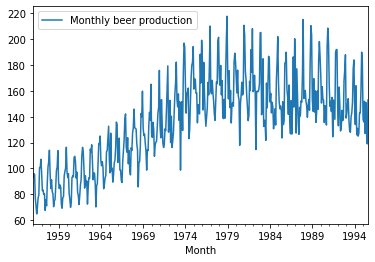

In [50]:
# To understand the pattern
sales_data.plot()

In [51]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

In [52]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [53]:
#Spliting the dataset into train and test
train = sales_data[:451]
test = sales_data[-25:]

In [54]:
#train.tail()
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451 entries, 1956-01-01 to 1993-07-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  451 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 1993-08-01 to 1995-08-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


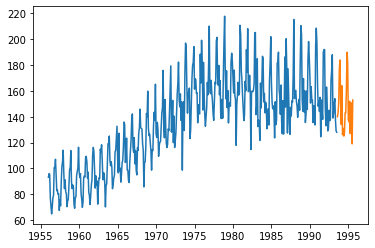

In [56]:
plt.plot(train)
plt.plot(test)

In [57]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3798.726, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3616.319, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3297.458, Time=0.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3455.667, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3292.430, Time=1.46 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3400.249, Time=0.56 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=3290.629, Time=3.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3376.801, Time=1.42 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=3278.402, Time=6.96 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=3343.993, Time=3.35 sec
 ARIMA(0,1,1)(4,1,1)[12]             : AIC=3265.486, Time=11.17 sec
 ARIMA(0,1,1)(4,1,0)[12]             : AIC=3288.300, Time=6.28 sec
 ARIMA(0,1,1)(5,1,1)[12]             : AIC=3261.978, Time=16.53 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=3260.975, Time=9.79 sec
 ARIMA(0,1,0)(5,1

In [58]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  451
Model:             SARIMAX(2, 1, 1)x(5, 1, [], 12)   Log Likelihood               -1616.183
Date:                             Thu, 07 Jul 2022   AIC                           3250.367
Time:                                     02:34:20   BIC                           3287.107
Sample:                                          0   HQIC                          3264.863
                                             - 451                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1569      0.042     -3.694      0.000      -0.240      -0.074
ar.L2         -0.1698      0.047     -3.622      0.000      -0.262      -0.078
ma.L1         -0.8455      0.028    -30.723      0.000      -0.899      -0.792
ar.S.L12      -0.7414      0.044    -16.898      0.000      -0.827      -0.655
ar.S.L24      -0.6441      0.050    -12.785      0.000      -0.743      -0.545
ar.S.L36      -0.5932      0.057    -10.443      0.000      -0.704      -0.482
ar.S.L48      -0.4939      0.053     -9.289      0.000      -0.598      -0.390
ar.S.L60      -0.2363      0.042     -5.612      0.000      -0.319      -0.154
sigma2        90.1349      5.040     17.886      0.000      80.258     100.012
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                36.34
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               4.16   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 25),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1993-08-01,139.502596
1993-09-01,138.117327
1993-10-01,165.190207
1993-11-01,181.752889
1993-12-01,191.825964
1994-01-01,144.196512
1994-02-01,139.779522
1994-03-01,152.768476
1994-04-01,142.506417


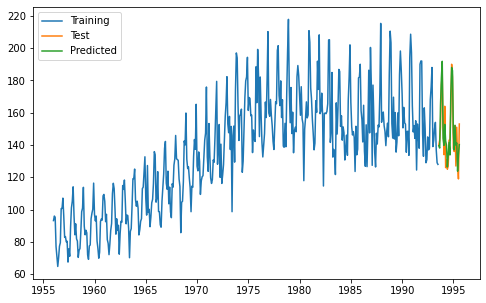

In [60]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [61]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Monthly beer production'], test['predicted_sales'])

0.7951780076038517